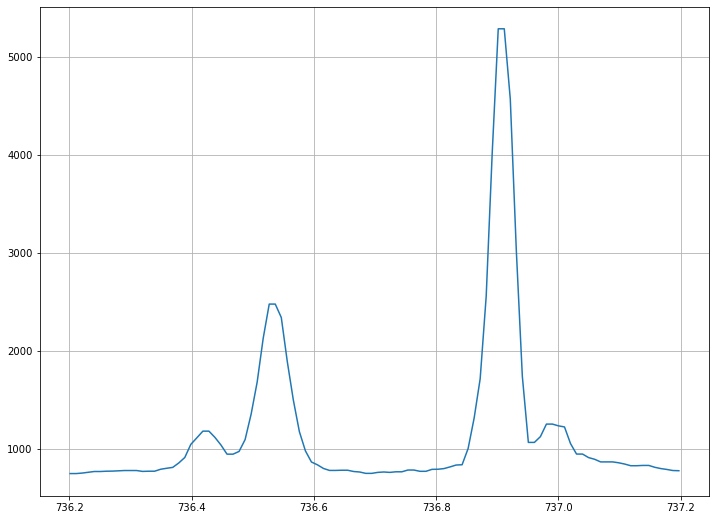

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel
import math
import uncertainties as unc

def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg



data97 = pd.read_csv('97-m9-9-siv-60s.csv')
regionMin = 736.2
regionMax = 737.2

argMin = findarg(data97['W'], regionMin)
argMax = findarg(data97['W'], regionMax)

plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data97['W'][argMin:argMax],data97['I'][argMin:argMax])


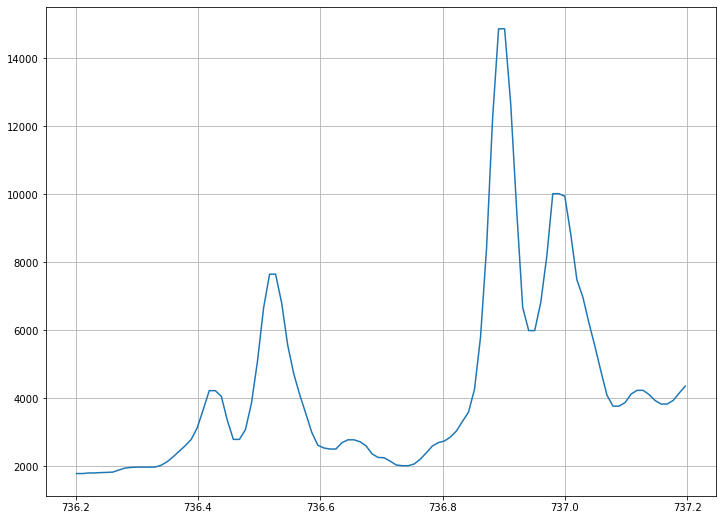

In [2]:

data98 = pd.read_csv('98-m3-3-siv-good.csv')

# argMin = findarg(data98['W'], regionMin)
# argMax = findarg(data98['W'], regionMax)

plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data98['W'][argMin:argMax],data98['I'][argMin:argMax])

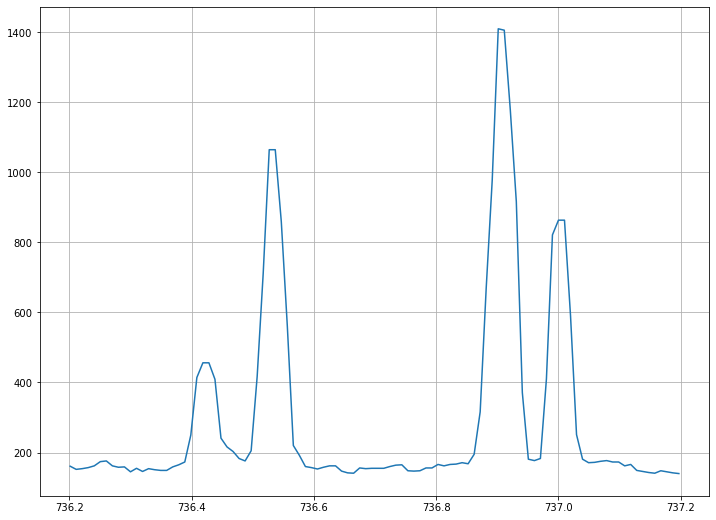

In [3]:

data1 = pd.read_csv('single_siv.csv')

# argMin = findarg(data1['W'], regionMin)
# argMax = findarg(data1['W'], regionMax)

plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data1['W'][argMin:argMax],data1['I'][argMin:argMax])


# Test for single SiV data

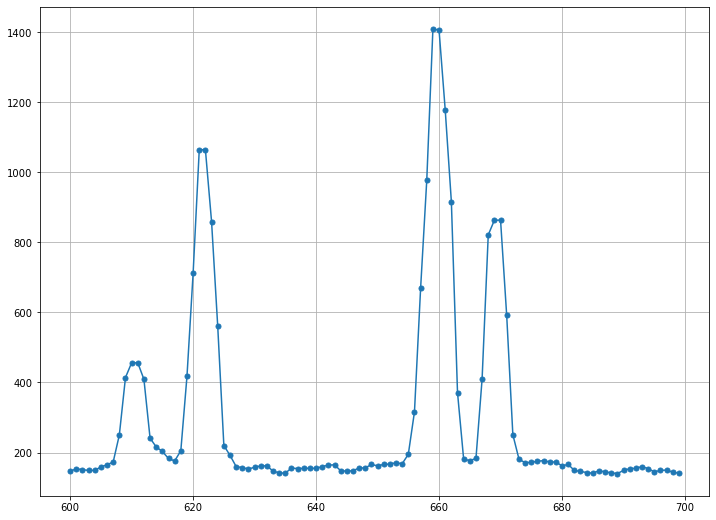

In [4]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data1['I'][600:700],'.-',markersize = 10);

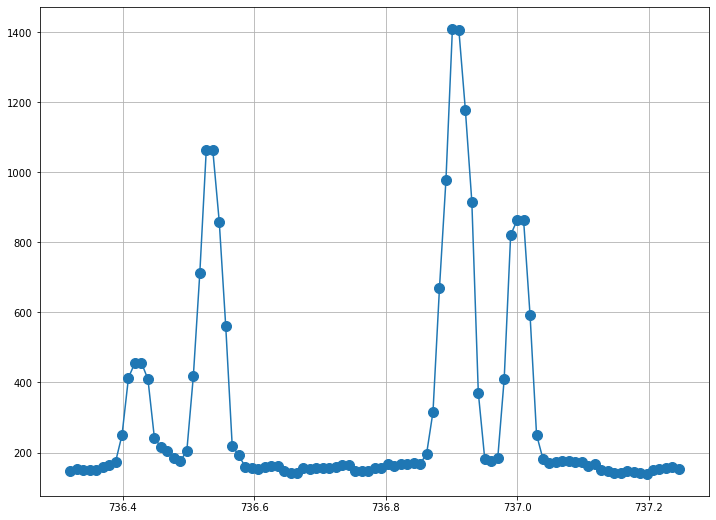

In [5]:
Index = list(range(600,695))
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data1['W'][Index],data1['I'][Index],'.-',markersize = 20);

In [6]:
# create an instance of the model
# Note use of prefixes to keep parameters separate
model1 = QuadraticModel() + LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_')+LorentzianModel(prefix='p3_') + LorentzianModel(prefix='p4_')
model = model1
params = model.make_params()

params['p1_center'].set(value=736.9, vary=True)
params['p1_amplitude'].set(value=88, min=0, vary=True)
params['p1_sigma'].set(value=0.0015, vary=True)

params['p2_center'].set(value=737, vary=True)
params['p2_amplitude'].set(value=40, min = 0,vary=True)
params['p2_sigma'].set(value=0.0015, vary=True)

params['p3_center'].set(value=736.53, vary=True)
params['p3_amplitude'].set(value=70, min=0, vary=True)
params['p3_sigma'].set(value=0.015, vary=True)

params['p4_center'].set(value=736.42, vary=True)
params['p4_amplitude'].set(value=40, min = 0,vary=True)
params['p4_sigma'].set(value=0.015, vary=True)

params['a'].set(value=0, vary=False)
params['b'].set(value=0, vary=True)
params['c'].set(value=0, vary=True)

[[Model]]
    ((((Model(parabolic) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 308
    # data points      = 95
    # variables        = 14
    chi-square         = 1022.62849
    reduced chi-square = 12.6250431
    Akaike info crit   = 253.744192
    Bayesian info crit = 289.498469
    R-squared          = 0.99987715
[[Variables]]
    a:             0 (fixed)
    b:             30.7992597 +/- 24.8891423 (80.81%) (init = 0)
    c:            -22572.5920 +/- 18340.3937 (81.25%) (init = 0)
    p1_amplitude:  69.4001656 +/- 4.28746129 (6.18%) (init = 88)
    p1_center:     736.907486 +/- 0.00102512 (0.00%) (init = 736.9)
    p1_sigma:      0.01452087 +/- 0.00128009 (8.82%) (init = 0.0015)
    p2_amplitude:  31.0656826 +/- 3.30733362 (10.65%) (init = 40)
    p2_center:     737.004097 +/- 0.00123148 (0.00%) (init = 737)
 

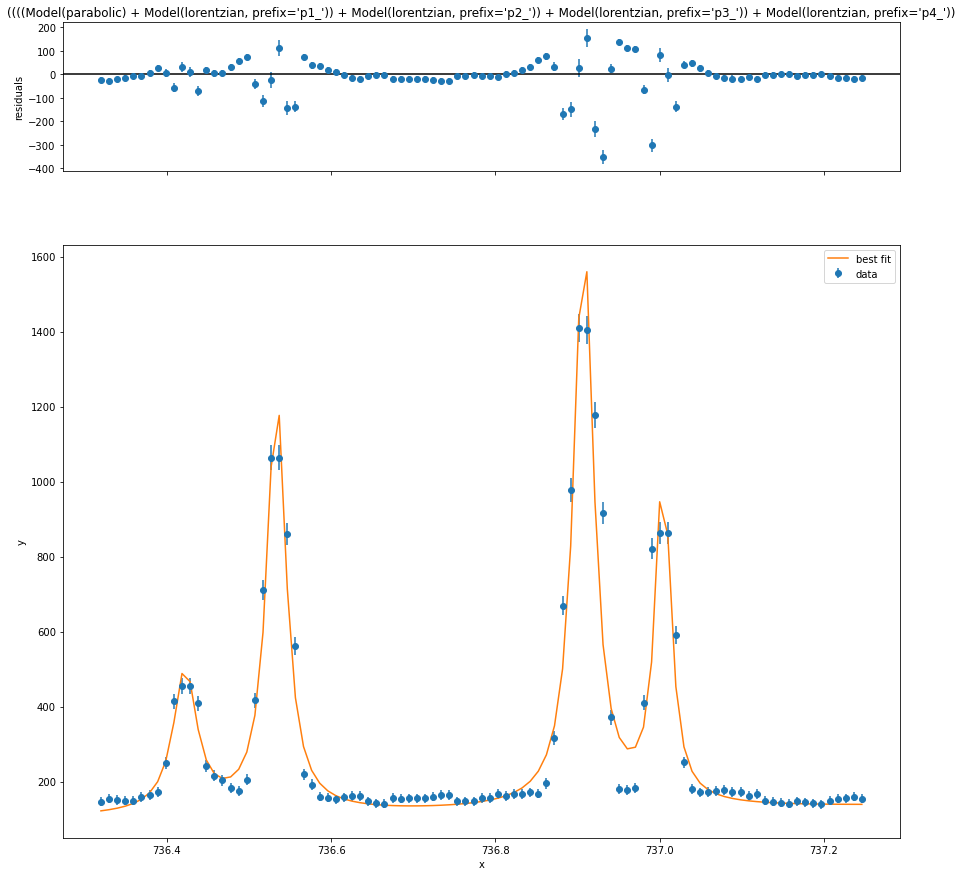

In [7]:
result_single = model.fit(data1['I'][Index], params, x=data1['W'], weights=1/np.sqrt(data1['I'][Index]))

print(result_single.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
result_single.plot(fig=myfig);

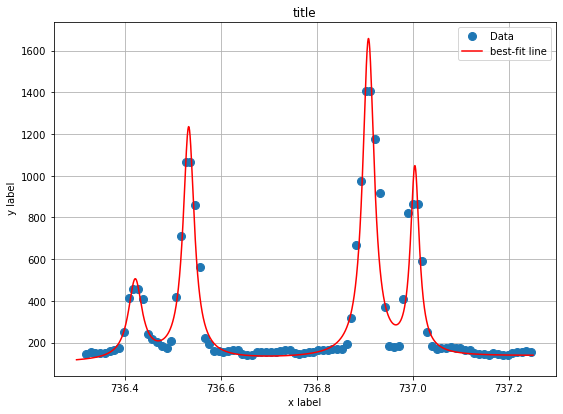

In [8]:
fit_x = np.linspace(736.3,737.25,2000)
fitline1 = result_single.eval(result_single.params, x = fit_x)
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('title')
plt.xlabel(r'x label')
plt.ylabel(r' y label')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.plot(data1['W'][Index], data1['I'][Index],'o',markersize = 8,label='Data')
plt.plot(fit_x, fitline1, '-r',label = 'best-fit line')
plt.legend()

# Test for EL2-97 SiV data

[[Model]]
    ((((Model(parabolic) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 296
    # data points      = 95
    # variables        = 13
    chi-square         = 892.373229
    reduced chi-square = 10.8826004
    Akaike info crit   = 238.800719
    Bayesian info crit = 272.001119
    R-squared          = 0.99998795
[[Variables]]
    a:             0 (fixed)
    b:             0 (fixed)
    c:             689.812819 +/- 17.1570824 (2.49%) (init = 0)
    p1_amplitude:  282.244383 +/- 9.00647999 (3.19%) (init = 88)
    p1_center:     736.907465 +/- 5.7541e-04 (0.00%) (init = 736.9)
    p1_sigma:      0.01701607 +/- 7.6156e-04 (4.48%) (init = 0.0015)
    p2_amplitude:  29.8337817 +/- 8.00468164 (26.83%) (init = 40)
    p2_center:     737.007098 +/- 0.00538984 (0.00%) (init = 737)
    p2_sigma:      0.02529373 +/- 0.00

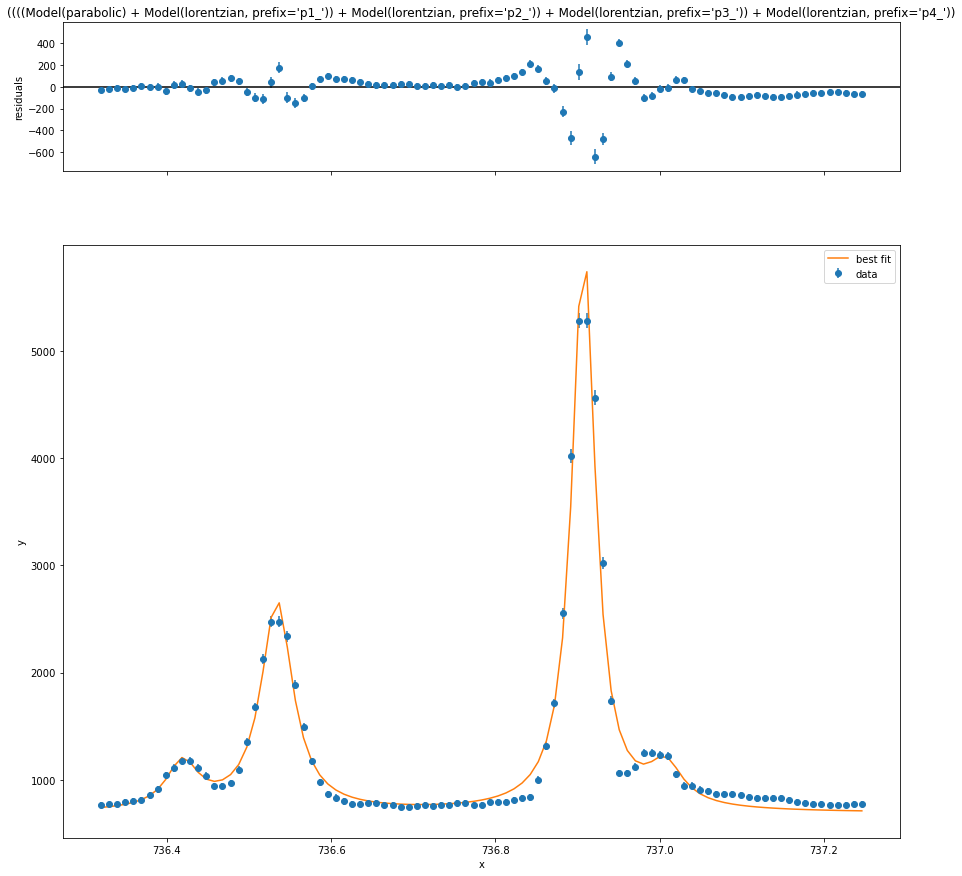

In [9]:
# create an instance of the model
# Note use of prefixes to keep parameters separate
model1 = QuadraticModel() + LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_')+LorentzianModel(prefix='p3_') + LorentzianModel(prefix='p4_')
model = model1
params = model.make_params()

params['p1_center'].set(value=736.9, vary=True)
params['p1_amplitude'].set(value=88, min=0, vary=True)
params['p1_sigma'].set(value=0.0015, vary=True)

params['p2_center'].set(value=737, vary=True)
params['p2_amplitude'].set(value=40, min = 0,vary=True)
params['p2_sigma'].set(value=0.0015, vary=True)

params['p3_center'].set(value=736.53, vary=True)
params['p3_amplitude'].set(value=70, min=0, vary=True)
params['p3_sigma'].set(value=0.015, vary=True)

params['p4_center'].set(value=736.42, vary=True)
params['p4_amplitude'].set(value=40, min = 0,vary=True)
params['p4_sigma'].set(value=0.015, vary=True)

params['a'].set(value=0, vary=False)
params['b'].set(value=0, vary=False)
params['c'].set(value=0, vary=True)

result_97 = model.fit(data97['I'][Index], params, x=data97['W'], weights=1/np.sqrt(data97['I'][Index]))

print(result_97.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
result_97.plot(fig=myfig);

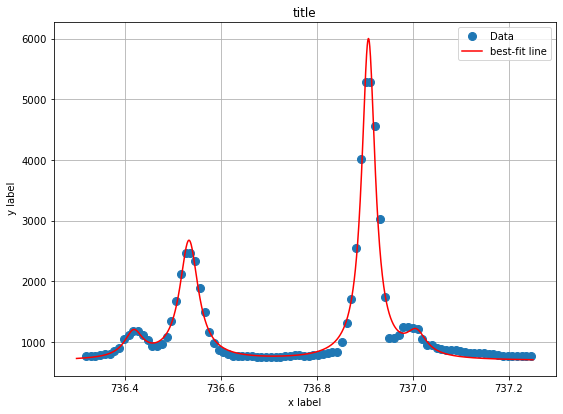

In [10]:
fit_x = np.linspace(736.3,737.25,2000)
fitline_97 = result_97.eval(result_97.params, x = fit_x)
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('title')
plt.xlabel(r'x label')
plt.ylabel(r' y label')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.plot(data97['W'][Index], data97['I'][Index],'o',markersize = 8, label='Data')
plt.plot(fit_x, fitline_97, '-r',label = 'best-fit line')
plt.legend()

# Test for EL2-98 SiV data

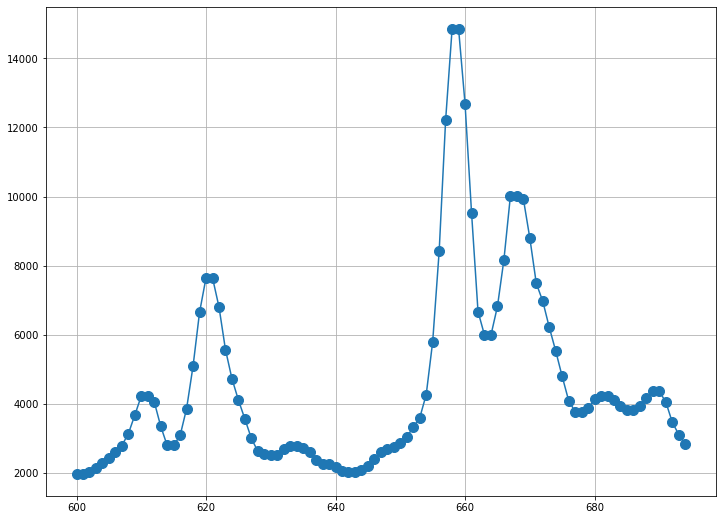

In [11]:
# Index = list(range(600,630))

Index = list(range(600,695))

myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data98['I'][Index],'.-',markersize = 20);

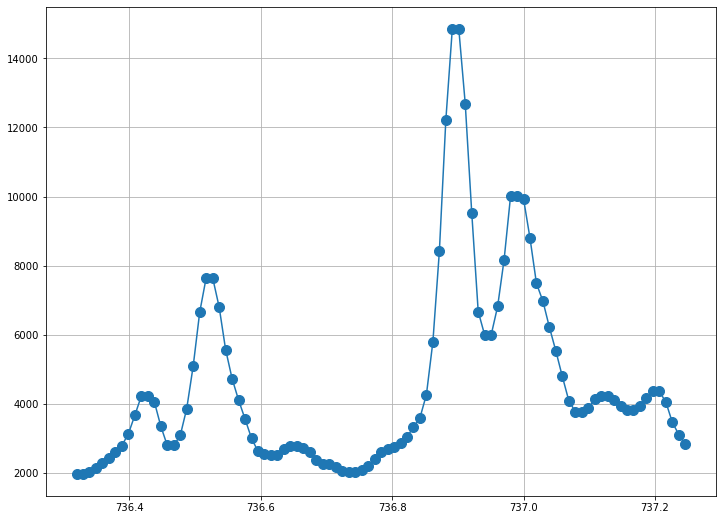

In [12]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.plot(data98['W'][Index],data98['I'][Index],'.-',markersize = 20);

[[Model]]
    ((((((((Model(parabolic) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_')) + Model(lorentzian, prefix='p4_')) + Model(lorentzian, prefix='n1_')) + Model(lorentzian, prefix='n2_')) + Model(lorentzian, prefix='n3_')) + Model(lorentzian, prefix='n4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 235
    # data points      = 95
    # variables        = 17
    chi-square         = 1326.04118
    reduced chi-square = 17.0005279
    Akaike info crit   = 284.427252
    Bayesian info crit = 327.843159
    R-squared          = 0.99999820
[[Variables]]
    a:             0 (fixed)
    b:            -40.2126699 +/- 158.409469 (393.93%) (init = 0)
    c:             31193.2349 +/- 116728.473 (374.21%) (init = 0)
    p1_amplitude:  864.264992 +/- 25.7086568 (2.97%) (init = 903)
    p1_center:     736.896304 +/- 5.3637e-04 (0.00%) (init = 736.8962)
    p1_sigma:      0.02040559 +/- 7.7749e-04 (3.81%)

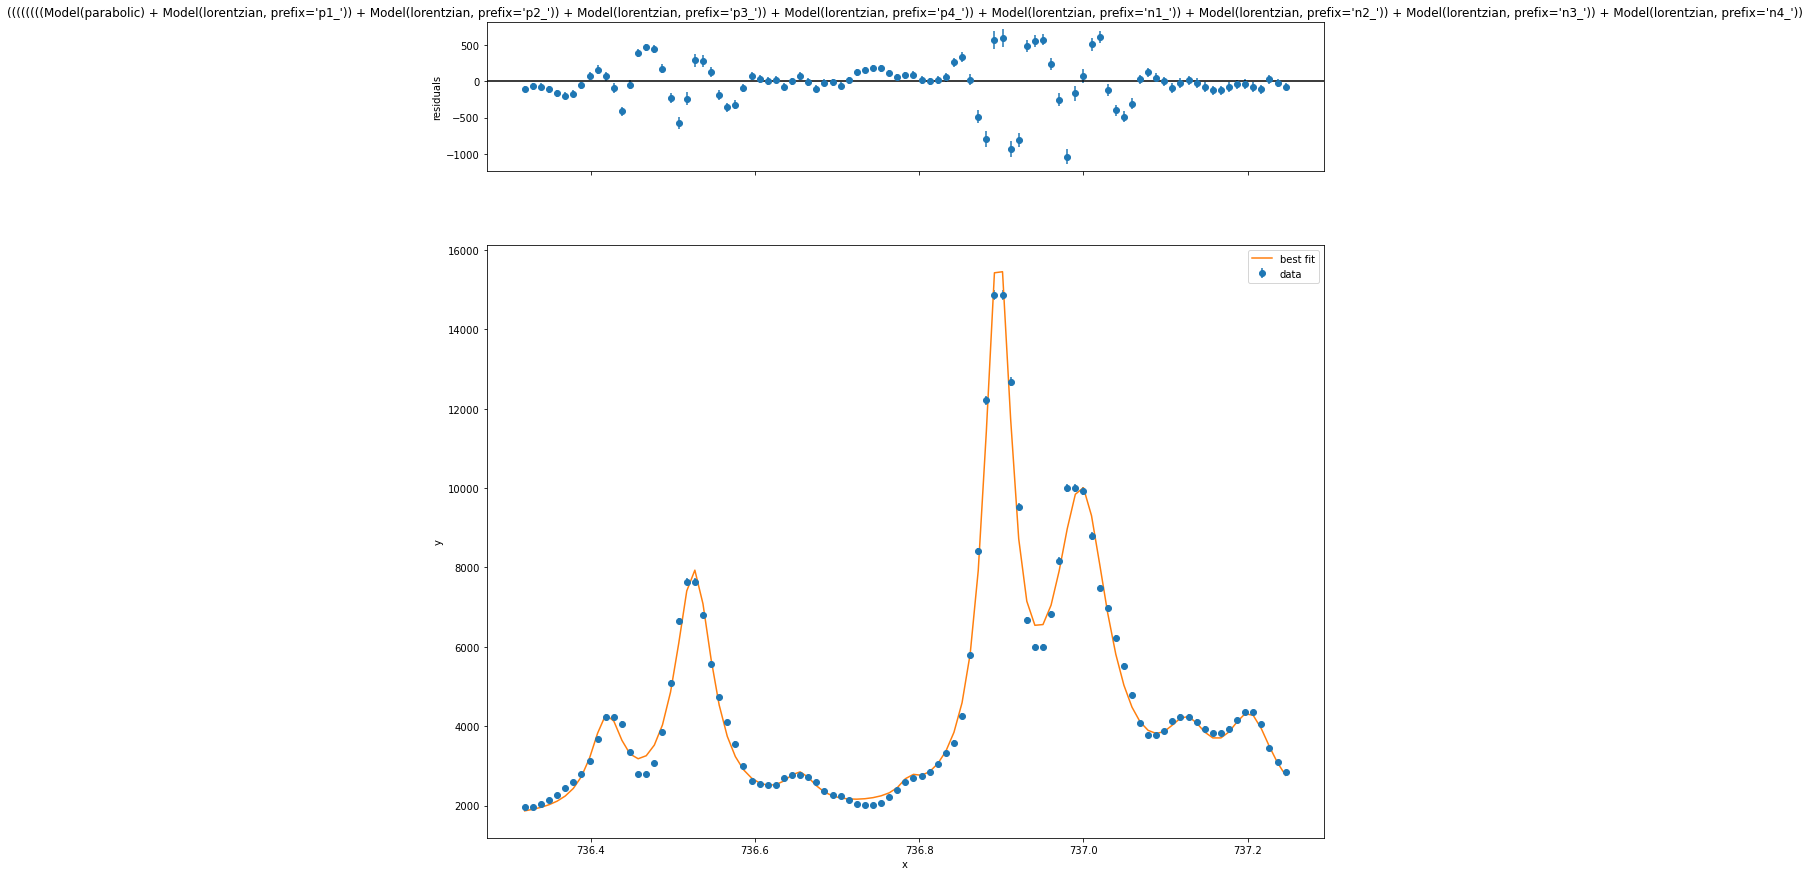

In [13]:
# create an instance of the model
# Note use of prefixes to keep parameters separate

model1 = QuadraticModel() + LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_')+ LorentzianModel(prefix='p3_')+ LorentzianModel(prefix='p4_') + LorentzianModel(prefix='n1_') + LorentzianModel(prefix='n2_')+ LorentzianModel(prefix='n3_')+ LorentzianModel(prefix='n4_')

# model1 = QuadraticModel() +  LorentzianModel(prefix='p3_')+ LorentzianModel(prefix='p4_')


model = model1
params = model.make_params()

params['p1_center'].set(value=736.896219, vary=True)
params['p1_amplitude'].set(value=903, min=0, vary=True)
params['p1_sigma'].set(value=0.0212, vary=True)

params['p2_center'].set(value=736.997531, vary=True)
params['p2_amplitude'].set(value=969.26, min = 0,vary=True)
params['p2_sigma'].set(value=0.03896, vary=True)

params['p3_center'].set(value=736.523, vary=True)
params['p3_amplitude'].set(value=676.055654, min=0, vary=True)
params['p3_sigma'].set(value=0.03259908, vary=True)

params['p4_center'].set(value=736.420865, vary=True)
params['p4_amplitude'].set(value=137.847887, min = 0,vary=True)
params['p4_sigma'].set(value=0.02015790, vary=True)

params['n1_center'].set(value=737.126, vary=False)
params['n1_amplitude'].set(value=160.178288, min = 0,vary=False)
params['n1_sigma'].set(value=0.03313533, vary=False)

params['n2_center'].set(value=737.203, vary=False)
params['n2_amplitude'].set(value=238.207115, min = 0,vary=False)
params['n2_sigma'].set(value=0.03463526, vary=False)

params['n3_center'].set(value=736.788521, vary=False)
params['n3_amplitude'].set(value=14.2996584, min = 0,vary=False)
params['n3_sigma'].set(value=0.01311507, vary=False)

params['n4_center'].set(value=736.655026, vary=True)
params['n4_amplitude'].set(value=48.2672689, min = 0,vary=True)
params['n4_sigma'].set(value=0.02112114, vary=True)


params['a'].set(value=0, vary=False)
params['b'].set(value=0, vary=True)
params['c'].set(value=0, vary=True)

# include a weight for small peaks

result_98 = model.fit(data98['I'][Index], params, x=data98['W'], weights=1/np.sqrt(data98['I'][Index]))

print(result_98.fit_report(show_correl=False))

myfig=plt.figure(figsize=(15,15))
result_98.plot(fig=myfig);

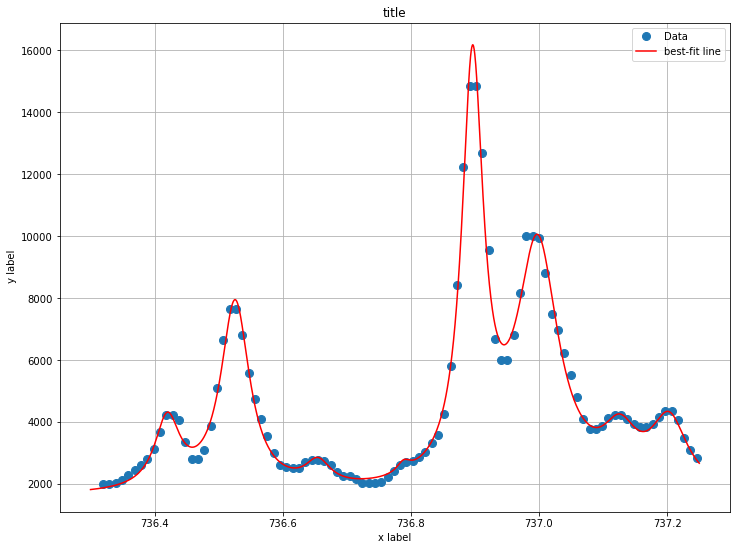

In [14]:
fit_x = np.linspace(736.3,737.25,2000)
fitline_98 = result_98.eval(result_98.params, x = fit_x)
plt.figure(figsize=(12,9))
plt.grid()
plt.title('title')
plt.xlabel(r'x label')
plt.ylabel(r' y label')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.plot(data98['W'][Index], data98['I'][Index],'o',markersize = 8, label='Data')
plt.plot(fit_x, fitline_98, '-r',label = 'best-fit line')
plt.legend()

# final plot

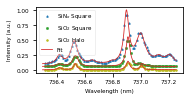

In [15]:
scale1=1.5
scale97=1.5


plt.rcParams.update({'font.size': 5.67})
cm = 1/2.54 
fig = plt.figure(figsize=(6.5*cm, 3.5*cm))
# plt.grid()
# plt.title('SiV Spectra')
plt.xlabel(r'Wavelength (nm)')
plt.ylabel(r'Intensity (a.u.)')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.plot(data98['W'][Index], data98['I'][Index]/16000,'^C0',markersize = 1.5, label='SiN$_x$ Square')
plt.plot(data97['W'][Index], data97['I'][Index]*scale97/16000,'sC2',markersize = 1.5, label='SiO$_2$ Square')
plt.plot(data1['W'][Index], data1['I'][Index]*scale1/16000,'oC8',markersize = 1.5, label='SiO$_2$ Halo')



plt.plot(fit_x, fitline1*scale1/16000, '-C3',linewidth = 0.8, label = 'Fit')
plt.plot(fit_x, fitline_97*scale97/16000, '-C3',linewidth = 0.8)
plt.plot(fit_x, fitline_98/16000, '-C3',linewidth = 0.8)
plt.legend(loc = 'upper left', fancybox=True, framealpha=0.3)


plt.tight_layout()
fig.savefig('siv example.pdf', format= 'pdf',transparent=True)